# <center>Data Dummy Maker</center></br>
<p  style="text-align:center">
<img src = "pics/graph.gif" style = "width:600px"></br></p>
The objective of this notebook is to explain how the dummy maker function works. The first pre requisite is that the data is already processed through machine learning and is converted into a numpy array of x and y

## Setting up the environement
We set up the environement and create a dummy numpy array where it represents our future collected data

In [1]:
#Setting up the environement
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#Dummy pandas dataframe
#Setting up time in minutes
start = 0
end = 480
def minute_range(start, end, step=15):
    cur = start
    time_list = [cur]
    while cur < end:
        cur = cur+step
        time_list.append(cur)
    return time_list
        

#numoy array
max = 50
time_list = minute_range(start,end,15)
x = np.linspace(0,m.pi*50,len(time_list))
y = np.array([m.sin(i/50)*max for i in x])
time = time_list


In [2]:
sd = 5
df = pd.DataFrame({'Time':time_list,'Demand':y})
df

,Time,Demand
0,0,0.000000e+00
1,15,4.900857e+00
2,30,9.754516e+00
3,45,1.451423e+01
4,60,1.913417e+01
5,75,2.356984e+01
6,90,2.777851e+01
7,105,3.171966e+01
8,120,3.535534e+01
9,135,3.865052e+01


## How the Data Looks

This is what the data is supposed to look like

<AxesSubplot:xlabel='Time(Minutes)', ylabel='Demand(No of Vehicles)'>

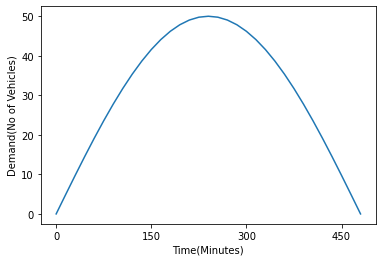

In [3]:
ticks_df = df.iloc[np.arange(0,31,10)]
x_ticks = ticks_df['Time']

fig,ax = plt.subplots()
ax.plot(df.Time,df.Demand)
ax.set_xticks(x_ticks)
ax.set(ylabel = 'Demand(No of Vehicles)', xlabel = 'Time(Minutes)')
ax

### The Main Function

In [4]:
df['Demand'] = df['Demand'].apply(lambda x: np.random.uniform(x - sd, x + sd, 1))

In [5]:
df.to_csv('test.csv')

### How the Data Looks AFter Randomization

<AxesSubplot:xlabel='Time(Minutes)', ylabel='Demand(No of Vehicles)'>

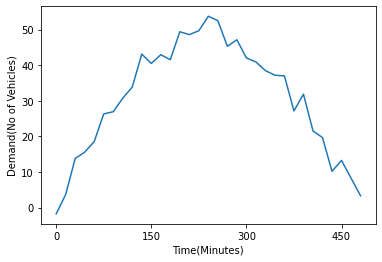

In [6]:
y_new = df.Demand
fig,ax = plt.subplots()
ax.plot(df.Time,y_new)
ax.set_xticks(x_ticks)
ax.set(ylabel = 'Demand(No of Vehicles)', xlabel = 'Time(Minutes)')
ax

## Complete Code

In [7]:
def randomize(df,sd):
    df['Demand'] = df['Demand'].apply(lambda x: np.random.uniform(x-sd, x+sd, 1))
    return df